<a href="https://colab.research.google.com/github/DinurakshanRavichandran/AdvancedMathematicsCoding/blob/main/Dinurakshan_2409095.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 : Application Of Differentiation In AI Model Optimization

In [ ]:
import sympy as sym
from sympy import sin, cos, tan, log, exp, symbols, diff

# Create basic setting for the question
x, y = sym.symbols('x y')

L = sym.exp(x ** 2 + y ** 2) + sym.cos(x * y)
L

exp(x**2 + y**2) + cos(x*y)

(a) Find the partial derivatives $ \frac{\partial L}{\partial x} $ and $ \frac{\partial L}{\partial y} $


In [ ]:
#import display to output answers in sympy form
from IPython.display import display

#Partial derivative relative to x
print(f"Differentiation by x : ")
derivative_relative_to_x = sym.diff(L, x)
display(derivative_relative_to_x)

#Partial derivative relative to y
print(f"Differentiation by y: ")
derivative_relative_to_y = sym.diff(L, y)
display(derivative_relative_to_y)

#Partial derivation relative to x then y
print(f"Differentiation by x then y :")
display(sym.diff(L, x, y))

#partial derivation relative to y then x
print(f"Differentition by y then x :")
display(sym.diff(L, y, x))


Differentiation by x : 


2*x*exp(x**2 + y**2) - y*sin(x*y)

Differentiation by y: 


-x*sin(x*y) + 2*y*exp(x**2 + y**2)

Differentiation by x then y :


4*x*y*exp(x**2 + y**2) - x*y*cos(x*y) - sin(x*y)

Differentition by y then x :


4*x*y*exp(x**2 + y**2) - x*y*cos(x*y) - sin(x*y)

(b) Write a python function that computes the gradient vector for a given input $(x,y)$

In [ ]:
#import from IPython to print the output in Sympy format
from IPython.display import display

def compute_gradient_vector(x_value, y_value):
  display(derivative_relative_to_x.subs([(x, x_value), (y, y_value)]))
  display(derivative_relative_to_y.subs([(x, x_value), (y, y_value)]))
  return(derivative_relative_to_x.subs([(x, x_value), (y, y_value)]), derivative_relative_to_y.subs([(x, x_value), (y, y_value)]))

compute_gradient_vector(1, 1)


-sin(1) + 2*exp(2)

-sin(1) + 2*exp(2)

(-sin(1) + 2*exp(2), -sin(1) + 2*exp(2))

(c) Use Matplotlib to visualize the loss function as a 3D surface plot over the range ${x,y \in}$ [-2, 2].

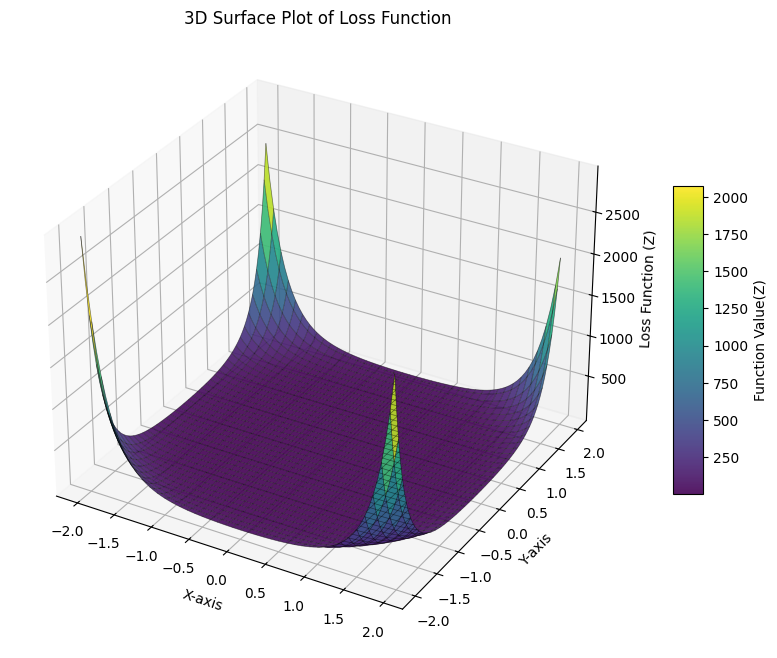

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
#import library for using 3d plots
from mpl_toolkits.mplot3d import Axes3D

# Define symbolic variables
 # x, y = sym.symbols('x y')

# Define the symbolic expression
#L = sym.exp(x ** 2 + y ** 2) + sym.cos(x * y)

# Create a figure and an axes object for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Define the data for the surface plot
x_range = np.arange(-2, 2, 0.05)  # Range for x values
y_range = np.arange(-2, 2, 0.05)  # Range for y values
X, Y = np.meshgrid(x_range, y_range)  # Create a grid

# Convert the symbolic expression to a numerical function using sympy.lambdify
num_L = sym.lambdify((x, y), L, "numpy")
Z = num_L(X, Y)  # Calculate Z values using the numerical function

# Create a surface plot using ax.plot_surface()
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor="none", alpha = 0.9)

#Wireframe for better visualization of the structure
ax.plot_wireframe(X, Y, Z, color = "k", linewidth = 0.5, alpha = 0.5)

#add a color bar
fig.colorbar(surface, ax = ax, shrink = 0.5, aspect = 10, label = 'Function Value(Z)')

# Set the labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Loss Function (Z)')
ax.set_title('3D Surface Plot of Loss Function')

plt.show()



(d) Discuss the significance of gradient vectors in model optimization particularly in gradient methods.

In [ ]:
print(f"Gradient vectors are the cornerstone of most optimization algorithms in machine learning. They provide a systematic way to adjust parameters iteratively, enabling efficient learning even in complex, high-dimensional spaces. The effectiveness of gradient-based optimization highlights their profound impact on modern machine learning practices.")

Gradient vectors are the cornerstone of most optimization algorithms in machine learning. They provide a systematic way to adjust parameters iteratively, enabling efficient learning even in complex, high-dimensional spaces. The effectiveness of gradient-based optimization highlights their profound impact on modern machine learning practices.


# Question 2 : Integration For Signal Processing

In [ ]:
# Make the basic setup for the question
t  = sym.symbols('t')
A = 2 * t ** 2 * sym.exp(-t)
A

2*t**2*exp(-t)

(a) Use the Python library SymPy to compute the definite integral $\int_{0}^{4} 2t^2e^{-t} dt$

In [ ]:
from IPython.display import display
import sympy as sym
from sympy import integrate

#integrate the function
display(sym.integrate(A, (t, 0, 4)))


4 - 52*exp(-4)

(b) Plot the function ${A(t)}$ using Matplotlib and annotate the graph with the area under the curve corresponding to the integral.

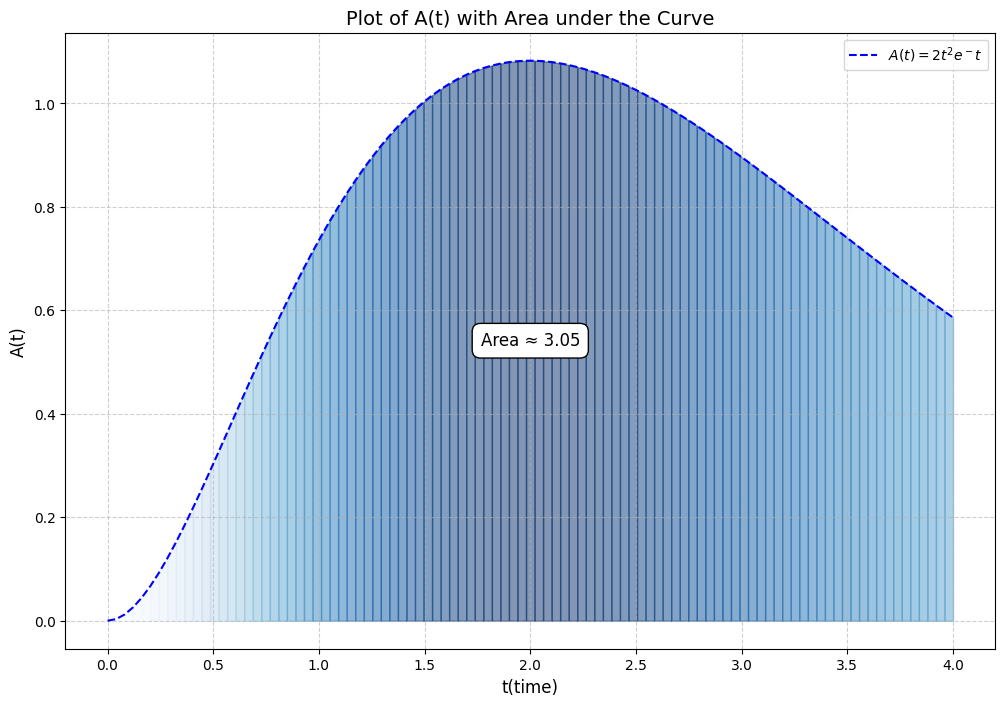

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Conver the symbolic function to a numerical function
num_A = sym.lambdify(t, A, "numpy")

# Create a range of t values for plotting
t_range = np.linspace(0, 4, 100) # Generate 100 points between 0 and 4
A_values = num_A(t_range) # Evaluate the numerical function at the t

#Create the plot
plt.figure(figsize = (12, 8))
plt.plot(t_range, A_values, label=f"$A(t) = 2t^2e^-t$", color = 'blue', linestyle = "--")

# Fill in the area under the curve with gradient
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

#Code to fill in between using a gradient
cmap = plt.get_cmap("Blues")
norm = Normalize(vmin=min(A_values), vmax=max(A_values))
colors = cmap(norm(A_values))

for i in range(len(t_range) - 1):
    plt.fill_between(t_range[i:i+2], A_values[i:i+2], color=colors[i], alpha=0.5)

# Annotate the area
integral_value = sym.integrate(A, (t, 0, 4)).evalf() #Calculate the integral value
plt.text(2, max(A_values) / 2, f"Area ≈ {integral_value:.2f}", fontsize=12, ha="center", va="center",
         bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"))

#Add labels and titles
plt.xlabel('t(time)', fontsize = 12)
plt.ylabel('A(t)', fontsize = 12)
plt.title('Plot of A(t)')
plt.title('Plot of A(t) with Area under the Curve', fontsize = 14)
plt.grid(True, linestyle = "--", alpha = 0.6)
plt.legend()

plt.show()

(c) Interpret the meaning of the computed integral in the context of signal energy

In [ ]:
print("The area under the curve represents the signal energy during the duration of 4 seconds")

The area under the curve represents the signal energy during the duration of 4 seconds


# Question 3: Series Convergence and Numerical Approximation

The function $f(x) = \ln(1 + x)$ can be approximated by the series : <br><br>
$$f(x) = x -\frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \dots $$

(a) Implement a Python script that uses the first 10 terms of this series to approximate $\ln(1 + x)$ for ${x \in}$ [-1, 1].

In [ ]:
import sympy as sym

n, x = sym.symbols('n x')
formula_for_nth_term = (-1)**(n-1) * (x**n) / n


def ln_series_approximation(x_value, num_terms = 10):
  approximation = 0
  for i in range(1, num_terms + 1):
    term = formula_for_nth_term.subs({n : i, x : x_value})
    approximation += term
  return approximation

#Testing : Approximate ln(1 + x) for a specific value of x
#result = ln_series_approximation(0.5, num_terms=10)
#print(f"Approximation of ln(1 + 0.5): {result.evalf()}")


(b) Plot the approximation and the actual function $\ln(x + 1)$ on the same graph for comparison

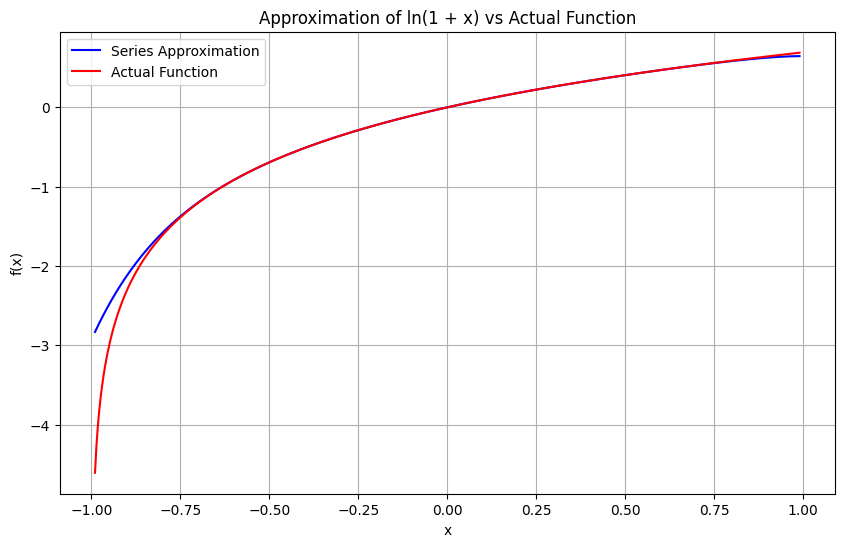

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(-0.99, 0.99, 500)
approximations = [ln_series_approximation(x, num_terms=10) for x in x_values]
actual_values = np.log(1 + x_values)

fig, ax = plt.subplots(figsize = (10, 6))

#Plot the series approximation and actual function
ax.plot(x_values, approximations, label = 'Series Approximation', color = 'blue')
ax.plot(x_values, actual_values, label = 'Actual Function', color = 'red')

# Add labels, title, legend, and grid
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Approximation of ln(1 + x) vs Actual Function')
ax.legend()
ax.grid(True)

plt.show()

(c) Analyze the convergence behaviour of the series, particularly focusing on the error for the larger values.

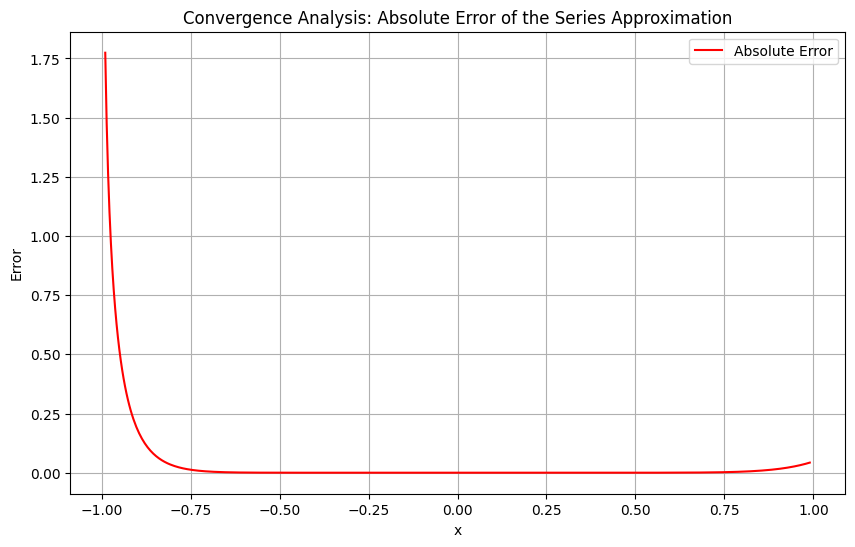

Max error in approximation over the interval: 1.773991


In [ ]:
# @title
errors = np.abs(np.array(approximations) - actual_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, errors, label='Absolute Error', color='red')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Convergence Analysis: Absolute Error of the Series Approximation')
plt.legend()
plt.grid()
plt.show()

# For larger values of x
print(f"Max error in approximation over the interval: {np.max(errors):.6f}")

# Question 4 : Fourier Transformation for Data Filtering

A noisy signal $s(t) = \sin(2\pi t) + 0.5\sin(10\pi t) + 0.3\sin(50\pi t)$ is sampled over the interval $t \in$ [0, 1] with 500 sample points.

In [ ]:
#Create the basic setup for the question
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


# Time domain: 500 samples over [0, 1)
t = np.linspace(0, 1, 500, endpoint=False)  # Time vector with 500 points
# Signal: s(t) = sin(2πt) + 0.5*sin(10πt) + 0.3*sin(50πt)
signal = np.sin(2 * np.pi * t) + 0.5 * np.sin(10 * np.pi * t) + 0.3 * np.sin(50 * np.pi * t)

(a) Perform a Fourier Transform on this signal using NumPy and plot the frequency spectrum.

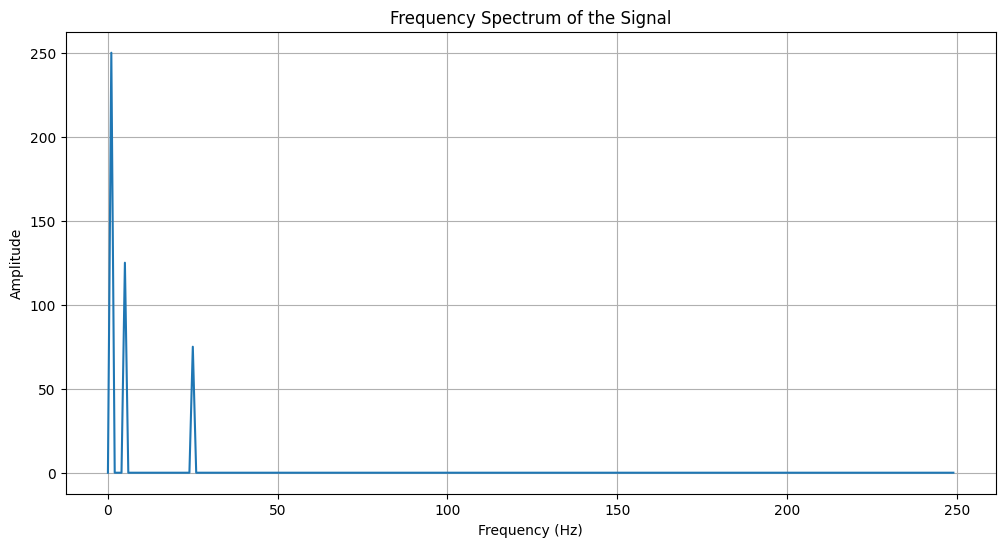

In [ ]:

# Perform Fourier Transform
fft_values = np.fft.fft(signal)  # Compute FFT
frequencies = np.fft.fftfreq(len(t), d=(t[1] - t[0]))  # Frequency bins
two_sided_spectrum = np.abs(fft_values)  # Magnitude of FFT

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(t)//2], two_sided_spectrum[:len(t)//2])  # Positive frequencies only
plt.title("Frequency Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

(b) Design and apply a low-pass filter to remove frequencies above 20 Hz, then plot the filtered signal.

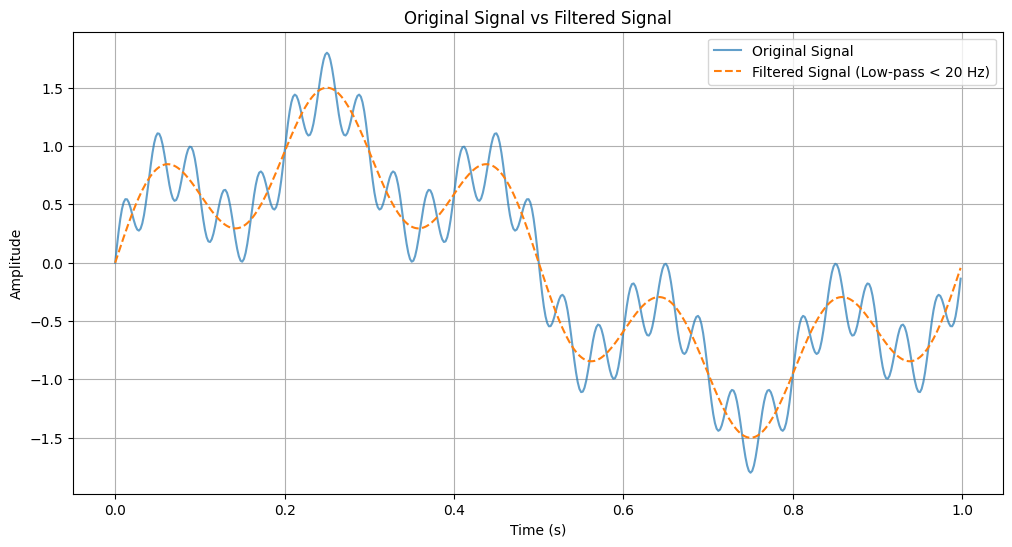

In [ ]:
cutoff_frequency = 20  # Low-pass filter cutoff frequency (Hz)
# Zero out frequencies greater than the cutoff
fft_values[np.abs(frequencies) > cutoff_frequency] = 0

# Perform Inverse Fourier Transform to get the filtered signal
filtered_signal = np.fft.ifft(fft_values).real  # Use the real part of the inverse FFT

# Plot original vs filtered signal
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label="Original Signal", alpha=0.7)
plt.plot(t, filtered_signal, label="Filtered Signal (Low-pass < 20 Hz)", linestyle="--")
plt.title("Original Signal vs Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

(c) Discuss how filtering impacts the signal and it's application in real-world data science scenarios, such as noise reduction in audio processing.

In [ ]:

print("The low-pass filter removes high-frequency components from the signal, such as the 25 Hz component in this case.")
print("The filtered signal retains the 1 Hz and 5 Hz components, which are below the cutoff frequency.")
print("Filtering is essential in applications like audio processing, where it removes unwanted noise or interference.")
print("It is also widely used in signal smoothing and feature extraction in various domains.")


The low-pass filter removes high-frequency components from the signal, such as the 25 Hz component in this case.
The filtered signal retains the 1 Hz and 5 Hz components, which are below the cutoff frequency.
Filtering is essential in applications like audio processing, where it removes unwanted noise or interference.
It is also widely used in signal smoothing and feature extraction in various domains.


# Question 5 : Image Processing Using Fourier and Discrete Cosine Transforms

Consider the image provided on the coursework description on Moodle. Your task is to perform the following operations using python:

(a) Find the edges in the image using a 2D Fourier Transform. Visualize the resulting image with detected edges.

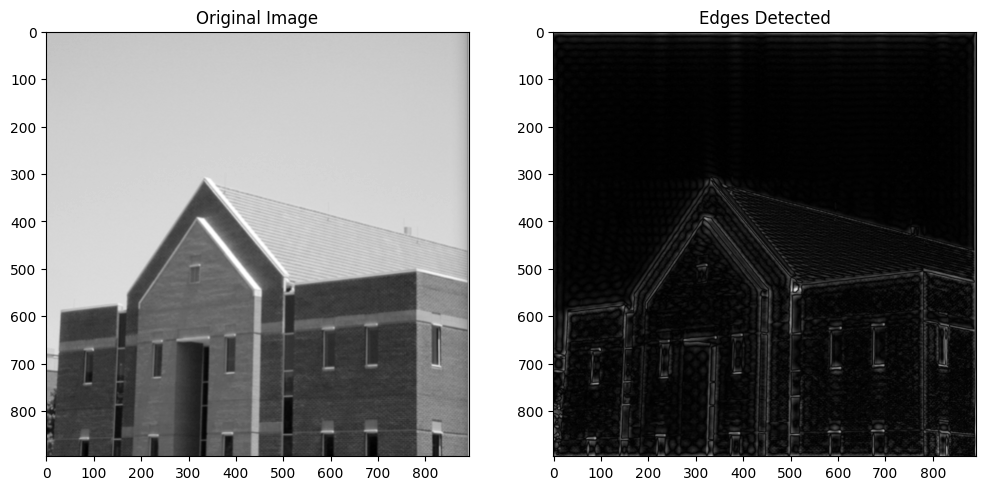

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fftpack import dct, idct

# Load the image
image = cv2.imread('Image.png', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# (a) Edge Detection using 2D Fourier Transform
# Perform 2D Fourier Transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

# Create a high-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0  # Suppress low frequencies

# Apply the high-pass filter
f_highpass = f_shift * mask
f_ishift = np.fft.ifftshift(f_highpass)
image_edges = np.abs(np.fft.ifft2(f_ishift))

# Plot the edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Edges Detected")
plt.imshow(image_edges, cmap='gray')
plt.show()


(b) Apply a Gaussian blur to the original image using a 2D Fourier Transform and compare it to a standard Gaussian blur.

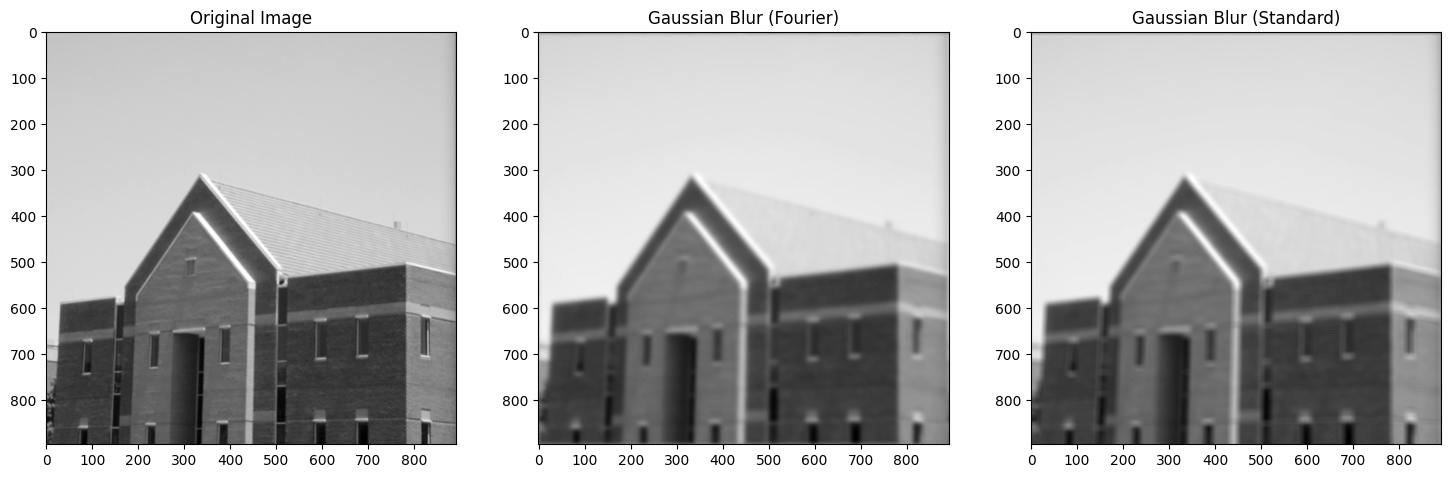

In [ ]:
# (b) Gaussian Blur using 2D Fourier Transform
# Create a Gaussian low-pass filter
def gaussian_filter(shape, sigma):
    x, y = np.meshgrid(
        np.linspace(-shape[1]//2, shape[1]//2, shape[1]),
        np.linspace(-shape[0]//2, shape[0]//2, shape[0])
    )
    return np.exp(-(x**2 + y**2) / (2 * sigma**2))

sigma = 30
gaussian_mask = gaussian_filter(image.shape, sigma)

# Apply the Gaussian filter in frequency domain
f_blur = f_shift * gaussian_mask
f_ishift_blur = np.fft.ifftshift(f_blur)
image_blur_fft = np.abs(np.fft.ifft2(f_ishift_blur))

# Apply standard Gaussian blur for comparison
image_blur_standard = cv2.GaussianBlur(image, (15, 15), sigmaX=sigma)

# Plot the results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Gaussian Blur (Fourier)")
plt.imshow(image_blur_fft, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Gaussian Blur (Standard)")
plt.imshow(image_blur_standard, cmap='gray')
plt.show()

(c) Apply a Discrete Cosine Transform (DCT) to the original image. Then scale the image down to 240px x 240px using the DCT. Display the scaled imageand compare it to the original.

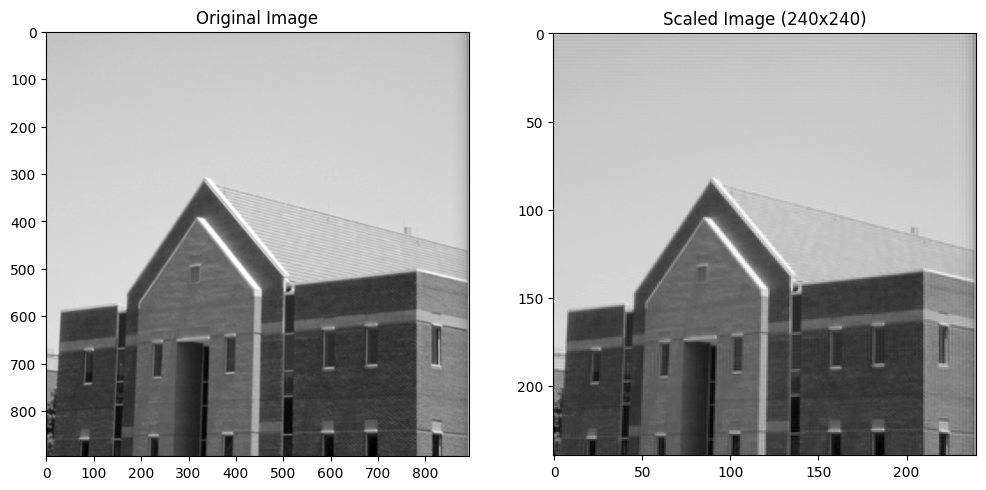

In [ ]:
# (c) Apply DCT and scale the image to 240x240
# Perform DCT
image_dct = dct(dct(image.T, norm='ortho').T, norm='ortho')

# Zero out high-frequency components for scaling
rows, cols = image_dct.shape
scaled_dct = image_dct[:240, :240]

# Perform inverse DCT to reconstruct the scaled image
scaled_image = idct(idct(scaled_dct.T, norm='ortho').T, norm='ortho')

# Plot the original and scaled images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Scaled Image (240x240)")
plt.imshow(scaled_image, cmap='gray')
plt.show()

(d) Reproduce and explain the common artifacts (ringing and blocking) that occur when an image is compressed using DCT. Provide visual examples of these artifacts.

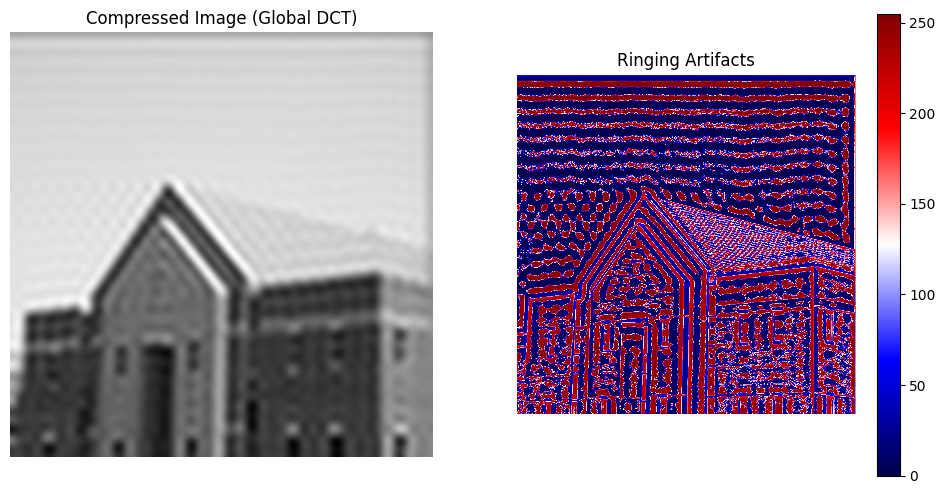

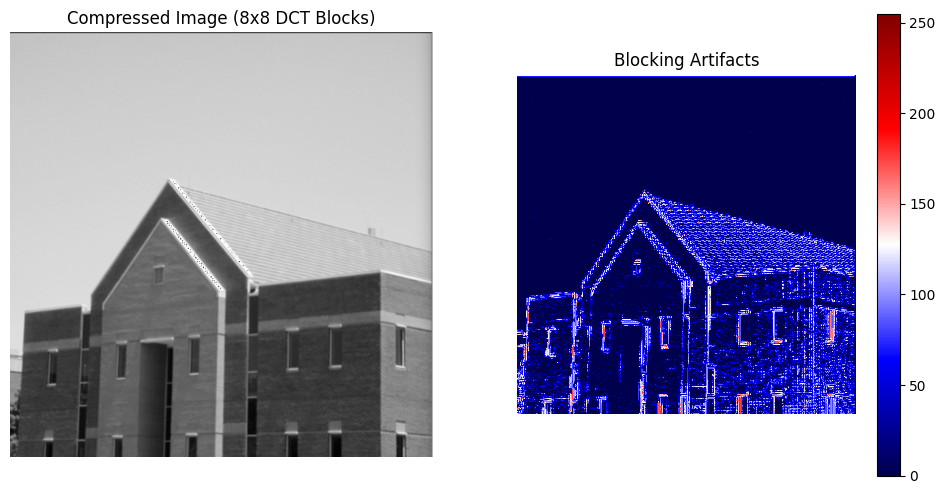

Ringing and blocking artifacts are common distortions that occur in images compressed using the Discrete Cosine Transform (DCT), particularly in lossy compression methods like JPEG. Ringing artifacts appear as oscillating patterns or halos around sharp edges in the image and are caused by the truncation of high-frequency components during compression. This happens because DCT represents the image as a sum of cosine waves, and abrupt changes (like edges) require many high-frequency components for accurate reconstruction. Blocking artifacts, on the other hand, occur due to the independent processing of small blocks of pixels (usually 8×8 or 16×16) in DCT-based methods. When compression aggressively reduces data, the boundaries between blocks become noticeable, especially in low-quality or highly compressed images, creating a 'grid-like' effect. These artifacts are more prominent in areas with smooth gradients or uniform colors, where the differences between blocks are more visible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fftpack import dct, idct

# Helper Functions
def compute_dct(image):
    """Compute the 2D DCT of an image."""
    return dct(dct(image.T, norm='ortho').T, norm='ortho')

def compute_idct(image_dct):
    """Compute the 2D inverse DCT of a DCT-transformed image."""
    return idct(idct(image_dct.T, norm='ortho').T, norm='ortho')

def aggressive_dct_compression(dct_image, compression_level):
    """
    Keep only top-left low-frequency DCT coefficients up to compression_level.
    """
    compressed_dct = np.zeros_like(dct_image)
    compressed_dct[:compression_level, :compression_level] = dct_image[:compression_level, :compression_level]
    return compressed_dct

# Load the image
image = cv2.imread('Image.png', cv2.IMREAD_GRAYSCALE)  # Load as grayscale
h, w = image.shape

# ------------------------
# Global DCT Compression - Ringing Artifacts
# ------------------------
compression_level = 50  # Compression level: keep top-left 50x50 coefficients
image_dct = compute_dct(image)
compressed_dct = aggressive_dct_compression(image_dct, compression_level)

# Reconstruct the compressed image
compressed_image = compute_idct(compressed_dct)
compressed_image_clipped = np.clip(compressed_image, 0, 255).astype(np.uint8)

# Compute difference (ringing artifacts)
difference_ringing = np.abs(image - compressed_image_clipped)

# Visualization - Ringing Artifacts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Compressed Image (Global DCT)")
plt.imshow(compressed_image_clipped, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Ringing Artifacts")
plt.imshow(difference_ringing, cmap='seismic')
plt.axis("off")
plt.colorbar()
plt.show()

# ------------------------
# Blocking Artifacts - 8x8 Block Compression
# ------------------------
block_size = 8
compressed_image_blocks = np.zeros_like(image)

# Process image block by block
for i in range(0, h, block_size):
    for j in range(0, w, block_size):
        block = image[i:i+block_size, j:j+block_size]
        block_dct = compute_dct(block)
        compressed_block_dct = aggressive_dct_compression(block_dct, 4)  # Keep top-left 4x4 coefficients
        block_reconstructed = compute_idct(compressed_block_dct)
        compressed_image_blocks[i:i+block_size, j:j+block_size] = block_reconstructed

compressed_image_blocks_clipped = np.clip(compressed_image_blocks, 0, 255).astype(np.uint8)

# Compute difference (blocking artifacts)
difference_blocking = np.abs(image - compressed_image_blocks_clipped)

# Visualization - Blocking Artifacts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Compressed Image (8x8 DCT Blocks)")
plt.imshow(compressed_image_blocks_clipped, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Blocking Artifacts")
plt.imshow(difference_blocking, cmap='seismic')
plt.axis("off")
plt.colorbar()
plt.show()

#Explanation
print("Ringing and blocking artifacts are common distortions that occur in images compressed using the Discrete Cosine Transform (DCT), particularly in lossy compression methods like JPEG. "
      "Ringing artifacts appear as oscillating patterns or halos around sharp edges in the image and are caused by the truncation of high-frequency components during compression. "
      "This happens because DCT represents the image as a sum of cosine waves, and abrupt changes (like edges) require many high-frequency components for accurate reconstruction. "
      "Blocking artifacts, on the other hand, occur due to the independent processing of small blocks of pixels (usually 8×8 or 16×16) in DCT-based methods. "
      "When compression aggressively reduces data, the boundaries between blocks become noticeable, especially in low-quality or highly compressed images, creating a 'grid-like' effect. "
      "These artifacts are more prominent in areas with smooth gradients or uniform colors, where the differences between blocks are more visible.")
